In [2]:
import pandas as pd
dataset = pd.read_csv('regression.txt')
dataset.describe()

,x,y
count,240.000000,240.000000
mean,0.505000,0.103008
std,0.287565,1.029367
min,0.010000,-1.909000
25%,0.257750,-0.676000
50%,0.505000,0.185500
75%,0.752250,0.741500
max,1.000000,2.286000


In [4]:
dataset_copy = dataset.copy()
train_set = dataset_copy.sample(frac=2/3, random_state=0)
test_set = dataset_copy.drop(train_set.index)

In [15]:
classes = [-0.676000, 0.185500, 0.741500, 1.000000]

train_classified = {}
for _, d in train_set.iterrows():
    t = tuple(f for f in d)
    if d['y'] < classes[0]:
        train_classified[t] = 0
    if d['y'] < classes[1]:
        train_classified[t] = 1
    if d['y'] < classes[2]:
        train_classified[t] = 2
    else:
        train_classified[t] = 3

In [17]:
import numpy as np


def knn(classified, k):
    def predict(point):
        distances = []
        for t in classified:
            distance = 0
            l = len(t)
            if len(t) != len(point):
                raise ValueError()
            for i in range(0, l):
                distance += (float(point[i]) - float(t[i])) ** 2
            distances.append((distance, classified[t]))
        distances.sort()
        prediction = [0, 0, 0, 0]
        for _, s in distances[:k]:
            prediction[s] += 1
        return classes[prediction.index(max(prediction))]
    return predict

for k in range(1, 15):
    mse = 0
    i = 0
    for _, t in test_set.iterrows():
        actual = t['y']
        predicted = knn(train_classified, k)((t['x'], t['y']))
        mse += (actual - predicted) ** 2
        i += 1
    mse = mse / i

    print(f'{f"k = {k}":-^20}\n')

    print(f'mse: {mse}\n')

-------k = 1--------

mse: 1.3065390906249998

-------k = 2--------

mse: 1.3065390906249998

-------k = 3--------

mse: 1.3062725124999999

-------k = 4--------

mse: 1.3060027031249999

-------k = 5--------

mse: 1.3060027031249999

-------k = 6--------

mse: 1.3060027031249999

-------k = 7--------

mse: 1.3060027031249999

-------k = 8--------

mse: 1.3060027031249999

-------k = 9--------

mse: 1.3060027031249999

-------k = 10-------

mse: 1.3060027031249999

-------k = 11-------

mse: 1.3060027031249999

-------k = 12-------

mse: 1.3060027031249999

-------k = 13-------

mse: 1.3060027031249999

-------k = 14-------

mse: 1.3062692812499999



<IPython.core.display.Javascript object>


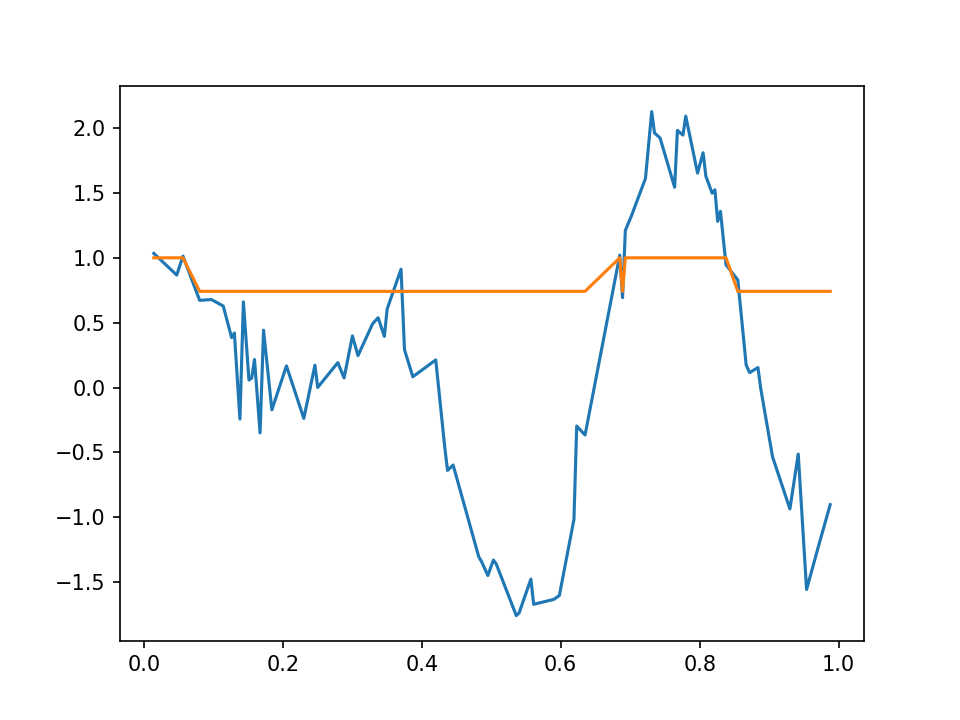

In [23]:
import matplotlib.pyplot as plt
%matplotlib notebook

k = 15

plt.figure()
plt.plot([t['x'] for _, t in test_set.iterrows()], [t['y'] for _, t in test_set.iterrows()])
plt.plot([t['x'] for _, t in test_set.iterrows()], [knn(train_classified, k)((t['x'], t['y'])) for _, t in test_set.iterrows()])
